In [38]:
import pandas as pd
import geopandas as gpd
import networkx as nx
import osmnx as ox
from shapely.geometry import Point

In [2]:
#!pip install pyrosm

In [3]:
# read the bike network shape file for southern California association of Government
sca=gpd.read_file('H:/Desktop/AT Census/Bike Network/Bike_Routes_%E2%80%93_SCAG_Region/Bike_Routes_%E2%80%93_SCAG_Region.shp')
sca.head()

,OBJECTID,NAME,CITY,COUNTY,CLASS_E,FACDES_E,CLASS_P,FACDES_P,INSTALL_DA,MILES_1,...,APP_ID,FTIP_ID,RBN,NOTES,YEAR,Shapelen,BIKEDIR,LANECOUNT,PLAN_NAME,geometry
0,1,Grand Ave,Diamond Bar,Los Angeles County,2,None,0,None,None,0.00173,...,0,0,None,None,2019,2.795049,None,0,San Bernardino County Non-Motorized Transporta...,"LINESTRING (-117.79115 33.99470, -117.79112 33..."
1,2,Hellman Ave,Eastvale,Riverside County,0,None,1,None,None,1.01910,...,0,0,None,None,2019,1640.092825,None,0,San Bernardino County Non-Motorized Transporta...,"MULTILINESTRING ((-117.61100 33.96526, -117.61..."
2,3,Hellman Ave,Eastvale,Riverside County,0,None,2,None,None,1.24939,...,0,0,None,None,2019,2010.700514,None,0,San Bernardino County Non-Motorized Transporta...,"MULTILINESTRING ((-117.61092 33.94943, -117.61..."
3,4,Sierra Ave,Jurupa Valley,Riverside County,0,None,2,None,None,0.02935,...,0,0,None,Added based on local input (City of Fontana),2019,47.236466,None,0,San Bernardino County Non-Motorized Transporta...,"LINESTRING (-117.43325 34.03418, -117.43300 34..."
4,5,Cactus Ave,Jurupa Valley,Riverside County,0,None,2,None,None,0.01826,...,0,0,None,None,2019,29.401198,None,0,San Bernardino County Non-Motorized Transporta...,"LINESTRING (-117.38328 34.03411, -117.38328 34..."


In [4]:
sca.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
def bclass(CLASS_E):
    if CLASS_E==0:
        return 'Unknown'
    elif CLASS_E==1:
        return 'Path'
    elif CLASS_E==2:
        return 'Bike Lane'
    elif CLASS_E==3:
        return 'Bike Route'
    elif CLASS_E==4:
        return 'Cycle Track'
    else:
        return 'Bike Route'

In [16]:
sca['Bicycle_Facilities']=sca.apply(lambda row: bclass(row['CLASS_E']),axis=1)
sca1=sca[['Bicycle_Facilities','geometry']]
sca1['Region']='Souther California'
sca1.head()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Bicycle_Facilities,geometry,Region
0,Bike Lane,"LINESTRING (-117.79115 33.99470, -117.79112 33...",Souther California
1,Unknown,"MULTILINESTRING ((-117.61100 33.96526, -117.61...",Souther California
2,Unknown,"MULTILINESTRING ((-117.61092 33.94943, -117.61...",Souther California
3,Unknown,"LINESTRING (-117.43325 34.03418, -117.43300 34...",Souther California
4,Unknown,"LINESTRING (-117.38328 34.03411, -117.38328 34...",Souther California


In [17]:
sca1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# read the bay area Shape file
ba=gpd.read_file('H:/Desktop/AT Census/Bike Network/Regional_Bike_Facilities (1)/regional_bike_facilities.shp')
ba.head()

,objectid,class,SHAPE_Leng,geometry
0,1,3,0.003786,"LINESTRING (-122.07222 37.57504, -122.07202 37..."
1,2,3,0.000052,"LINESTRING (-122.07102 37.59690, -122.07100 37..."
2,3,3,0.000429,"LINESTRING (-122.07102 37.59690, -122.07100 37..."
3,4,3,0.005095,"LINESTRING (-122.06971 37.58520, -122.06957 37..."
4,5,3,0.001791,"LINESTRING (-122.06414 37.94522, -122.06414 37..."


In [9]:
ba.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
def bclass1(Class):
    if Class==1:
        return 'Path'
    elif Class==2:
        return 'Bike Lane'
    else:
        return 'Bike Route'

In [11]:
ba['Bicycle_Facilities']=ba.apply(lambda row: bclass1(row['class']),axis=1)
ba1=ba[['Bicycle_Facilities','geometry']]
ba1['Region']='Bay Area'
ba1.head()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Bicycle_Facilities,geometry,Region
0,Bike Route,"LINESTRING (-122.07222 37.57504, -122.07202 37...",Bay Area
1,Bike Route,"LINESTRING (-122.07102 37.59690, -122.07100 37...",Bay Area
2,Bike Route,"LINESTRING (-122.07102 37.59690, -122.07100 37...",Bay Area
3,Bike Route,"LINESTRING (-122.06971 37.58520, -122.06957 37...",Bay Area
4,Bike Route,"LINESTRING (-122.06414 37.94522, -122.06414 37...",Bay Area


<AxesSubplot:>

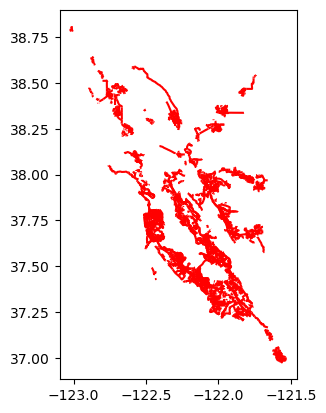

In [12]:
ba1.plot(color='red')

In [13]:
ba1.head()

,Bicycle_Facilities,geometry,Region
0,Bike Route,"LINESTRING (-122.07222 37.57504, -122.07202 37...",Bay Area
1,Bike Route,"LINESTRING (-122.07102 37.59690, -122.07100 37...",Bay Area
2,Bike Route,"LINESTRING (-122.07102 37.59690, -122.07100 37...",Bay Area
3,Bike Route,"LINESTRING (-122.06971 37.58520, -122.06957 37...",Bay Area
4,Bike Route,"LINESTRING (-122.06414 37.94522, -122.06414 37...",Bay Area


In [14]:
# Read San Dieago Network
sd=gpd.read_file('H:/Desktop/AT Census/Bike Network/San Dieago_BIKE_ROUTES/BIKE_ROUTES.shp')
sd.head()

,OBJECTID,RD20FULL,Jurisdicti,ROUTE,Route_Clas,SHAPE_Leng,geometry
0,1,C ST,San Diego,15,Bikeways Coming Soon,277.007322,"LINESTRING (6282558.000 1841787.000, 6282835.0..."
1,2,EAST BEYER BL,San Diego,15,Bikeways Coming Soon,1567.982732,"LINESTRING (6319932.000 1780527.500, 6320380.0..."
2,3,EAST BEYER BL,San Diego,15,Bikeways Coming Soon,886.161034,"LINESTRING (6319266.001 1781112.000, 6319361.9..."
3,4,EAST BEYER BL,San Diego,15,Bikeways Coming Soon,1041.334539,"LINESTRING (6318407.000 1781694.000, 6318841.0..."
4,5,UNIVERSITY AV,San Diego,15,Bikeways Coming Soon,181.002728,"LINESTRING (6281375.000 1853257.000, 6281556.0..."


In [18]:
def bclass2(Route_Clas):
    if Route_Clas=='Bikeways Coming Soon':
        return 'Path'
    elif Route_Clas=='Bike Lane':
        return 'Bike Lane'
    elif Route_Clas=='Bike Route':
        return 'Bike Route'
    elif Route_Clas=='Freeway Shoulder Bicycle Access':
        return 'Other'
    elif Route_Clas=='Multi-Use Path':
        return 'Path'
    elif Route_Clas=='Separated Bikeway':
        return 'Cycle Track'
    else:
        return 'Bike Route'

In [19]:
sd['Bicycle_Facilities']=sd.apply(lambda row: bclass2(row['Route_Clas']),axis=1)
sd1=sd[['Bicycle_Facilities','geometry']]
sd1['Region']='San Diego'
sd1.head()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Bicycle_Facilities,geometry,Region
0,Path,"LINESTRING (6282558.000 1841787.000, 6282835.0...",San Diego
1,Path,"LINESTRING (6319932.000 1780527.500, 6320380.0...",San Diego
2,Path,"LINESTRING (6319266.001 1781112.000, 6319361.9...",San Diego
3,Path,"LINESTRING (6318407.000 1781694.000, 6318841.0...",San Diego
4,Path,"LINESTRING (6281375.000 1853257.000, 6281556.0...",San Diego


In [20]:
sd2=gpd.GeoDataFrame(sd1, geometry='geometry', crs='EPSG:2230') 
sd3=sd2.to_crs("epsg:4326")
sd3.head()

,Bicycle_Facilities,geometry,Region
0,Path,"LINESTRING (-117.15743 32.71677, -117.15653 32...",San Diego
1,Path,"LINESTRING (-117.03443 32.54924, -117.03297 32...",San Diego
2,Path,"LINESTRING (-117.03661 32.55083, -117.03629 32...",San Diego
3,Path,"LINESTRING (-117.03941 32.55241, -117.03799 32...",San Diego
4,Path,"LINESTRING (-117.16161 32.74826, -117.16102 32...",San Diego


In [21]:
# read Santa Barbara and San Luis shape file
santa_ba=gpd.read_file('H:/Desktop/AT Census/Bike Network/Bikeways, Santa Barbara County_bikeways-shapefile/3853-s3_2002_s3_bikeways.shp')
santa_ba.head()

,ENTITY,LAYER,ELEVATION,THICKNESS,COLOR,geometry
0,Polyline,Existing_Class2,0.0,0.0,5,"LINESTRING (-120.43633 34.87539, -120.43629 34..."
1,Polyline,Existing_Class2,0.0,0.0,5,"LINESTRING (-120.43532 34.86516, -120.43305 34..."
2,Polyline,Existing_Class2,0.0,0.0,5,"LINESTRING (-120.41876 34.85760, -120.41874 34..."
3,Polyline,Existing_Class2,0.0,0.0,5,"LINESTRING (-120.42305 34.89447, -120.42332 34..."
4,Polyline,Existing_Class2,0.0,0.0,5,"LINESTRING (-120.41944 34.89215, -120.42230 34..."


In [22]:
def bclass3(LAYER):
    if (LAYER=='Existing_Class1' and LAYER=='Proposed_Class1'):
        return 'Path'
    elif (LAYER=='Existing_Class2' and LAYER=='Proposed_Class2'):
        return 'Bike Lane'
    else:
        return 'Bike Route'

In [23]:
santa_ba['Bicycle_Facilities']=santa_ba.apply(lambda row: bclass3(row['LAYER']),axis=1)
santa_ba1=santa_ba[['Bicycle_Facilities','geometry']]
santa_ba1['Region']='santa_barbara'
santa_ba1.head()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Bicycle_Facilities,geometry,Region
0,Bike Route,"LINESTRING (-120.43633 34.87539, -120.43629 34...",santa_barbara
1,Bike Route,"LINESTRING (-120.43532 34.86516, -120.43305 34...",santa_barbara
2,Bike Route,"LINESTRING (-120.41876 34.85760, -120.41874 34...",santa_barbara
3,Bike Route,"LINESTRING (-120.42305 34.89447, -120.42332 34...",santa_barbara
4,Bike Route,"LINESTRING (-120.41944 34.89215, -120.42230 34...",santa_barbara


In [24]:
santa_ba1.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
santa_ba2=gpd.GeoDataFrame(santa_ba1, geometry='geometry', crs='EPSG:4326') 
#sd3=sd2.to_crs("epsg:4326")
santa_ba2.head()

,Bicycle_Facilities,geometry,Region
0,Bike Route,"LINESTRING (-120.43633 34.87539, -120.43629 34...",santa_barbara
1,Bike Route,"LINESTRING (-120.43532 34.86516, -120.43305 34...",santa_barbara
2,Bike Route,"LINESTRING (-120.41876 34.85760, -120.41874 34...",santa_barbara
3,Bike Route,"LINESTRING (-120.42305 34.89447, -120.42332 34...",santa_barbara
4,Bike Route,"LINESTRING (-120.41944 34.89215, -120.42230 34...",santa_barbara


In [26]:
san_luis=gpd.read_file('H:/Desktop/AT Census/Bike Network/San Luis Obispo County_trans_pwd_bikeways-shapefile/3853-s27_2013_s2_trans_pwd_bikeways.shp')
san_luis.head()

,From_To,Existing,Class,Road_No,Shape_Leng,Score,Shape_STLe,Shape_Le_1,geometry
0,Ash Ave: B St to Cayucos Dr,Yes,II,4283,505.499326,0,505.499326,505.499326,"LINESTRING (-120.90652 35.45130, -120.90646 35..."
1,Cayucos Ave to Birch St,Yes,III,4286,331.392208,0,331.392208,331.392208,"LINESTRING (-120.90597 35.45213, -120.90650 35..."
2,Las Tablas Rd to Vineyard Dr,No,II,5501,4253.249990,0,4253.249990,4253.249990,"LINESTRING (-120.71428 35.55436, -120.71432 35..."
3,Vineyard Dr to Las Tablas Rd,No,II,5170,4295.917696,0,4295.917696,4295.917696,"LINESTRING (-120.72660 35.55447, -120.72815 35..."
4,Binscarth Rd: Pecho Rd to Broderson Ave,Yes,III,3030,2655.190384,0,2655.190384,2655.190384,"LINESTRING (-120.85207 35.31849, -120.85047 35..."


In [27]:
def bclass4(Class):
    if Class=='I':
        return 'Path'
    elif Class=='II':
        return 'Bike Lane'
    else:
        return 'Bike Route'

In [28]:
san_luis['Bicycle_Facilities']=san_luis.apply(lambda row: bclass4(row['Class']),axis=1)
san_luis1=san_luis[['Bicycle_Facilities','geometry']]
san_luis1['Region']='san_luis'
san_luis1.head()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Bicycle_Facilities,geometry,Region
0,Bike Lane,"LINESTRING (-120.90652 35.45130, -120.90646 35...",san_luis
1,Bike Route,"LINESTRING (-120.90597 35.45213, -120.90650 35...",san_luis
2,Bike Lane,"LINESTRING (-120.71428 35.55436, -120.71432 35...",san_luis
3,Bike Lane,"LINESTRING (-120.72660 35.55447, -120.72815 35...",san_luis
4,Bike Route,"LINESTRING (-120.85207 35.31849, -120.85047 35...",san_luis


In [29]:
san_luis1.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
san_luis2=gpd.GeoDataFrame(san_luis1, geometry='geometry', crs='EPSG:4326') 
#sd3=sd2.to_crs("epsg:4326")
san_luis2.head()

,Bicycle_Facilities,geometry,Region
0,Bike Lane,"LINESTRING (-120.90652 35.45130, -120.90646 35...",san_luis
1,Bike Route,"LINESTRING (-120.90597 35.45213, -120.90650 35...",san_luis
2,Bike Lane,"LINESTRING (-120.71428 35.55436, -120.71432 35...",san_luis
3,Bike Lane,"LINESTRING (-120.72660 35.55447, -120.72815 35...",san_luis
4,Bike Route,"LINESTRING (-120.85207 35.31849, -120.85047 35...",san_luis


In [31]:
# read yolo county bike paths shape file
yolo=gpd.read_file('H:/Desktop/AT Census/Bike Network/Yolo_County/yolo_roadcenterlines_2014.shp')
yolo.head()

,PREFIXTYPE,PREFIXDIR,STREETNAME,STREETTYPE,SUFFIXDIR,LF_EXHAUST,LT_EXHAUST,RF_EXHAUST,RT_EXHAUST,LF_ACTUAL,...,RPT_ERROR,MSAG,EDIT_COMME,COMMENT,EDITOR_ID,YCFC,Community,BIKE_CLASS,Shape_Leng,geometry
0,None,None,PUTAH CREEK,RD,None,0,0,0,0,0,...,None,0,None,None,0,09,Winters,None,505.558109,"LINESTRING (6558105.953 1939871.879, 6558322.9..."
1,None,None,SUTTER,RD,None,48400,48598,48401,48599,48450,...,None,0,None,None,0,09,Clarksburg,None,456.617846,"LINESTRING (6672117.923 1880704.734, 6672176.7..."
2,None,None,HARRISON,ST,None,16500,16598,16501,16599,0,...,None,0,None,None,0,09,Guinda,None,274.573059,"LINESTRING (6505940.764 2062567.908, 6506175.5..."
3,None,None,HWY 16,None,None,12601,13399,12600,13398,12645,...,None,0,None,None,0,06,Brooks,None,2081.171676,"LINESTRING (6516764.641 2038142.791, 6517958.4..."
4,None,None,HWY 16,None,None,26600,26798,26601,26799,26640,...,None,0,None,None,0,06,Esparto,None,1165.521093,"LINESTRING (6556659.304 2012761.457, 6556863.4..."


In [32]:
def bclass5(BIKE_CLASS):
    if BIKE_CLASS=='I':
        return 'Path'
    elif BIKE_CLASS=='II':
        return 'Bike Lane'
    elif BIKE_CLASS=='III':
        return 'Bike Route'
    else:
        return 'Unknown'

In [33]:
yolo['Bicycle_Facilities']=yolo.apply(lambda row: bclass5(row['BIKE_CLASS']),axis=1)
yolo1=yolo[['Bicycle_Facilities','geometry']]
yolo1['Region']='yolo County'
yolo1.head()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Bicycle_Facilities,geometry,Region
0,Unknown,"LINESTRING (6558105.953 1939871.879, 6558322.9...",yolo County
1,Unknown,"LINESTRING (6672117.923 1880704.734, 6672176.7...",yolo County
2,Unknown,"LINESTRING (6505940.764 2062567.908, 6506175.5...",yolo County
3,Unknown,"LINESTRING (6516764.641 2038142.791, 6517958.4...",yolo County
4,Unknown,"LINESTRING (6556659.304 2012761.457, 6556863.4...",yolo County


In [34]:
yolo1.crs

<Derived Projected CRS: EPSG:2226>
Name: NAD83 / California zone 2 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties of Alpine; Amador; Butte; Colusa; El Dorado; Glenn; Lake; Mendocino; Napa; Nevada; Placer; Sacramento; Sierra; Solano; Sonoma; Sutter; Yolo; Yuba.
- bounds: (-124.06, 38.02, -119.54, 40.16)
Coordinate Operation:
- name: SPCS83 California zone 2 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [35]:
yolo2=gpd.GeoDataFrame(yolo1, geometry='geometry', crs='EPSG:2226') 
yolo3=yolo2.to_crs("epsg:4326")
yolo3.head()

,Bicycle_Facilities,geometry,Region
0,Unknown,"LINESTRING (-122.01244 38.48891, -122.01168 38...",yolo County
1,Unknown,"LINESTRING (-121.61500 38.32580, -121.61479 38...",yolo County
2,Unknown,"LINESTRING (-122.19561 38.82565, -122.19479 38...",yolo County
3,Unknown,"LINESTRING (-122.15747 38.75864, -122.15327 38...",yolo County
4,Unknown,"LINESTRING (-122.01754 38.68906, -122.01683 38...",yolo County


In [36]:
# Now import Humboldt County data
federal_t=gpd.read_file('H:/Desktop/AT Census/Bike Network/ElDoradoCountyBikeRoutesTrails/ElDoradoCounty_federal_trails.shp')
mountain_bt=gpd.read_file('H:/Desktop/AT Census/Bike Network/ElDoradoCountyBikeRoutesTrails/ElDoradoCounty_mountain_bike_trails.shp')
natural_surface_t=gpd.read_file('H:/Desktop/AT Census/Bike Network/ElDoradoCountyBikeRoutesTrails/ElDoradoCounty_natural_surfac_trails.shp')
rural_cycling_t=gpd.read_file('H:/Desktop/AT Census/Bike Network/ElDoradoCountyBikeRoutesTrails/ElDoradoCounty_rural_cycling_route.shp')
serrano_natural_t=gpd.read_file('H:/Desktop/AT Census/Bike Network/ElDoradoCountyBikeRoutesTrails/ElDoradoCounty_serrano_natural_trails.shp')
bike_t=gpd.read_file('H:/Desktop/AT Census/Bike Network/ElDoradoCountyBikeRoutesTrails/ElDoradoCountyBike_trails.shp')
bike_t.head()

,OBJECTID,CLASS,NAME,MILES,FROM_,TO_,WNTR_MAINT,MAINT_JURS,YR_OF_CONS,IMPLEMENT,COUNTY,E_BIKE,ShapeSTLen,GlobalID,CreationDa,Creator,EditDate,Editor,SHAPE_Leng,geometry
0,1,I,VILLAGE BLVD (NORTH),0.546032,ACE COURT,NORTHWOOD BLVD,YES,WASHOE COUNTY,Before 2006,WASHOE COUNTY,WASHOE COUNTY,None,878.754949,{3217D7E3-2F41-41A0-B0E5-29417AA1E57A},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,1137.215911,"LINESTRING (-13353004.497 4757911.237, -133529..."
1,2,I,NORTHWOOD BLVD,0.353422,VILLAGE BLVD (NORTH),NORTHWOOD MIDBLOCK CROSSING,YES,WASHOE COUNTY,Before 2006,WASHOE COUNTY,WASHOE COUNTY,None,568.778879,{5BB7372E-5208-42FB-BF53-58DD270E7757},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,733.243713,"LINESTRING (-13353004.497 4757911.237, -133531..."
2,3,I,NORTHWOOD BLVD,0.264228,NORTHWOOD MIDBLOCK CROSSING,STATE ROUTE 28,YES,WASHOE COUNTY,Before 2006,WASHOE COUNTY,WASHOE COUNTY,None,425.235283,{2D384335-4B98-4956-B65D-3DAB892C9441},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,549.224458,"LINESTRING (-13353743.699 4757953.183, -133538..."
3,4,I,VILLAGE BLVD (NORTH),0.190352,NORTHWOOD BLVD,STATE ROUTE 28,YES,WASHOE COUNTY,Before 2006,WASHOE COUNTY,WASHOE COUNTY,None,306.341967,{2DE51DD2-1519-4486-BA4F-516B455AEA5E},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,396.399907,"LINESTRING (-13353004.497 4757911.237, -133530..."
4,5,I,MAYS BLVD,0.270598,LAKESHORE BLVD,ALLEN WAY,YES,WASHOE COUNTY,Before 2006,WASHOE COUNTY,WASHOE COUNTY,None,536.086290,{D835E92D-04CA-464D-B50B-132049BBFDB3},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,691.395271,"LINESTRING (-13354287.904 4757147.652, -133545..."


In [37]:
bike_t['Bicycle_Facilities']=bike_t.apply(lambda row: bclass5(row['CLASS']),axis=1)
bike_t1=bike_t[['Bicycle_Facilities','geometry']]
bike_t1['Region']='ElDorado'
bike_t1.head()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Bicycle_Facilities,geometry,Region
0,Path,"LINESTRING (-13353004.497 4757911.237, -133529...",ElDorado
1,Path,"LINESTRING (-13353004.497 4757911.237, -133531...",ElDorado
2,Path,"LINESTRING (-13353743.699 4757953.183, -133538...",ElDorado
3,Path,"LINESTRING (-13353004.497 4757911.237, -133530...",ElDorado
4,Path,"LINESTRING (-13354287.904 4757147.652, -133545...",ElDorado


In [38]:
bike_t1['Bicycle_Facilities'].unique()

array(['Path', 'Unknown', 'Bike Lane', 'Bike Route'], dtype=object)

In [39]:
federal_t.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
natural_surface_t.head()

,cartodb_id,name,type,miles,surface,GlobalID,CreationDa,Creator,EditDate,Editor,SHAPE_Leng,geometry
0,2,Stefani Trail,Natural Surface Trail,0.961087,gravel/b.g./dirt,{422C51F5-ED29-445A-8983-0E5EF2213132},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,1983.862152,"LINESTRING (-13476228.256 4676972.289, -134762..."
1,3,Quail Ridge Trail,Natural Surface Trail,0.180624,gravel/b.g./dirt,{8ED07A5B-9DE9-4428-B9F3-D53FBB2C2E3C},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,372.947284,"LINESTRING (-13476729.878 4678159.097, -134767..."
2,6,Turtle Cove,Natural Surface Trail,0.159195,gravel/b.g./dirt,{669A267E-E2E8-45AD-99D7-743F013CFB6C},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,328.206440,"LINESTRING (-13475959.375 4675409.257, -134759..."
3,7,Zimmerman Trail,Natural Surface Trail,0.651131,gravel/b.g./dirt,{12A35B33-3C81-4A3F-9012-829986126D55},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,1344.044727,"LINESTRING (-13473788.565 4675563.707, -134737..."
4,8,Zimmerman Trail,Natural Surface Trail,0.158422,gravel/b.g./dirt,{AA02486F-1FD4-49AB-B239-7DADAEB86351},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,327.102257,"LINESTRING (-13473320.102 4675540.049, -134733..."


In [41]:
serrano_natural_t = serrano_natural_t.rename(columns={'type': 'Bicycle_Facilities'})
serrano_natural_t=serrano_natural_t[['Bicycle_Facilities','geometry']]
serrano_natural_t['Region']='ElDorado'
serrano_natural_t.head()

,Bicycle_Facilities,geometry,Region
0,Nature Trail,"LINESTRING (-13476228.256 4676972.289, -134762...",ElDorado
1,Nature Trail,"LINESTRING (-13476729.878 4678159.097, -134767...",ElDorado
2,Nature Trail,"LINESTRING (-13475959.375 4675409.257, -134759...",ElDorado
3,Nature Trail,"LINESTRING (-13473788.565 4675563.707, -134737...",ElDorado
4,Nature Trail,"LINESTRING (-13473320.102 4675540.049, -134733...",ElDorado


In [42]:
serrano_natural_t['Bicycle_Facilities'].unique()

array(['Nature Trail'], dtype=object)

In [43]:
rural_cycling_t.head()

,cartodb_id,name,comments,miles,GlobalID,CreationDa,Creator,EditDate,Editor,SHAPE_Leng,geometry
0,1,Unpaved El Dorado Trail section 1\n,None,2.875800,{DA95F202-9E5F-481D-B35B-2987A177256B},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,5932.068884,"LINESTRING (-13450313.341 4679281.384, -134503..."
1,2,Unpaved El Dorado Trail section 2,None,2.878550,{1B72C554-25E4-48DD-877D-9ED5FDDB6A41},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,5933.247176,"LINESTRING (-13454221.189 4676500.989, -134543..."
2,3,Unpaved El Dorado Trail section 4\n,None,0.920104,{F6CBCED6-753F-40DC-ABCF-B6F8215DA7D8},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,1900.362944,"LINESTRING (-13436791.529 4683086.976, -134366..."
3,4,Unpaved El Dorado Trail section 3\n,None,19.991900,{5F86960E-BE45-4D6D-968C-00A6E7690C4E},2021-07-15,sara.dougherty_ELDORADOCOUNTY,2021-07-15,sara.dougherty_ELDORADOCOUNTY,41218.962429,"LINESTRING (-13459103.595 4677200.869, -134591..."


In [44]:
mountain_bt = mountain_bt.rename(columns={'type': 'Bicycle_Facilities'})
mountain_bt=mountain_bt[['Bicycle_Facilities','geometry']]
mountain_bt['Region']='ElDorado'
mountain_bt.head()

,Bicycle_Facilities,geometry,Region
0,mountain bike trails,"LINESTRING (-13363003.961 4696222.009, -133630...",ElDorado
1,mountain bike trails,"LINESTRING (-13471737.277 4708867.287, -134717...",ElDorado
2,mountain bike trails,"LINESTRING (-13468211.010 4696344.031, -134681...",ElDorado
3,mountain bike trails,"LINESTRING (-13467373.999 4696101.988, -134673...",ElDorado
4,mountain bike trails,"LINESTRING (-13467899.983 4692990.940, -134679...",ElDorado


In [45]:
mountain_bt['Bicycle_Facilities'].unique()

array(['mountain bike trails'], dtype=object)

In [46]:
natural_surface_t = natural_surface_t.rename(columns={'type': 'Bicycle_Facilities'})
natural_surface_t=natural_surface_t[['Bicycle_Facilities','geometry']]
natural_surface_t['Region']='ElDorado'
natural_surface_t.head()

,Bicycle_Facilities,geometry,Region
0,Natural Surface Trail,"LINESTRING (-13476228.256 4676972.289, -134762...",ElDorado
1,Natural Surface Trail,"LINESTRING (-13476729.878 4678159.097, -134767...",ElDorado
2,Natural Surface Trail,"LINESTRING (-13475959.375 4675409.257, -134759...",ElDorado
3,Natural Surface Trail,"LINESTRING (-13473788.565 4675563.707, -134737...",ElDorado
4,Natural Surface Trail,"LINESTRING (-13473320.102 4675540.049, -134733...",ElDorado


In [47]:
natural_surface_t['Bicycle_Facilities'].unique()

array(['Natural Surface Trail', 'Mountain Biking Trail'], dtype=object)

In [48]:
rural_cycling_t['Bicycle_Facilities'] ='rural cycling route'
rural_cycling_t=rural_cycling_t[['Bicycle_Facilities','geometry']]
rural_cycling_t['Region']='ElDorado'
rural_cycling_t.head()

,Bicycle_Facilities,geometry,Region
0,rural cycling route,"LINESTRING (-13450313.341 4679281.384, -134503...",ElDorado
1,rural cycling route,"LINESTRING (-13454221.189 4676500.989, -134543...",ElDorado
2,rural cycling route,"LINESTRING (-13436791.529 4683086.976, -134366...",ElDorado
3,rural cycling route,"LINESTRING (-13459103.595 4677200.869, -134591...",ElDorado


In [49]:
federal_t = federal_t.rename(columns={'type': 'Bicycle_Facilities'})
federal_t=federal_t[['Bicycle_Facilities','geometry']]
federal_t['Region']='ElDorado'
federal_t.head()

,Bicycle_Facilities,geometry,Region
0,Federal Trail,"LINESTRING (-13374623.476 4703962.039, -133746...",ElDorado
1,None,"LINESTRING (-13436042.689 4684083.791, -134360...",ElDorado
2,County Trail,"LINESTRING (-13474244.729 4656107.946, -134742...",ElDorado
3,Federal Trail,"MULTILINESTRING ((-13450096.882 4682471.810, -...",ElDorado
4,None,"LINESTRING (-13450096.882 4682471.810, -134501...",ElDorado


In [55]:
#combined all Eldorado shape file
Eldorado=pd.concat([bike_t1,serrano_natural_t,mountain_bt,natural_surface_t,rural_cycling_t,federal_t],axis=0)
Eldorado.head()

,Bicycle_Facilities,geometry,Region
0,Path,"LINESTRING (-13353004.497 4757911.237, -133529...",ElDorado
1,Path,"LINESTRING (-13353004.497 4757911.237, -133531...",ElDorado
2,Path,"LINESTRING (-13353743.699 4757953.183, -133538...",ElDorado
3,Path,"LINESTRING (-13353004.497 4757911.237, -133530...",ElDorado
4,Path,"LINESTRING (-13354287.904 4757147.652, -133545...",ElDorado


In [57]:
Eldorado['Bicycle_Facilities'].unique()

array(['Path', 'Unknown', 'Bike Lane', 'Bike Route', 'Nature Trail',
       'mountain bike trails', 'Natural Surface Trail',
       'Mountain Biking Trail', 'rural cycling route', 'Federal Trail',
       None, 'County Trail', 'State Trail', 'Regional Trail'],
      dtype=object)

In [58]:
def bclass6(Bicycle_Facilities):
    if Bicycle_Facilities=='Path':
        return 'Path'
    elif Bicycle_Facilities=='Bike Lane':
        return 'Bike Lane'
    elif Bicycle_Facilities=='Bike Route':
        return 'Bike Route'
    elif Bicycle_Facilities=='Nature Trail':
        return 'Trail'
    elif Bicycle_Facilities=='mountain bike trails':
        return 'Trail'
    elif Bicycle_Facilities=='Natural Surface Trail':
        return 'Trail'
    elif Bicycle_Facilities=='Mountain Biking Trail':
        return 'Trail'
    elif Bicycle_Facilities=='Federal Trail':
        return 'Trail'
    elif Bicycle_Facilities=='County Trail':
        return 'Trail'
    elif Bicycle_Facilities=='State Trail':
        return 'Trail'
    elif Bicycle_Facilities=='Regional Trail':
        return 'Trail'
    elif Bicycle_Facilities=='rural cycling route':
        return 'Bike Route'
    else:
        return 'Unknown'

In [59]:
Eldorado['Bicycle_Facilities']=Eldorado.apply(lambda row: bclass6(row['Bicycle_Facilities']),axis=1)

In [60]:
Eldorado2=gpd.GeoDataFrame(Eldorado, geometry='geometry', crs='EPSG:3857') 
Eldorado3=Eldorado2.to_crs("epsg:4326")
Eldorado3.head()

,Bicycle_Facilities,geometry,Region
0,Path,"LINESTRING (-119.95208 39.25254, -119.95122 39...",ElDorado
1,Path,"LINESTRING (-119.95208 39.25254, -119.95327 39...",ElDorado
2,Path,"LINESTRING (-119.95872 39.25284, -119.95950 39...",ElDorado
3,Path,"LINESTRING (-119.95208 39.25254, -119.95256 39...",ElDorado
4,Path,"LINESTRING (-119.96361 39.24723, -119.96598 39...",ElDorado


In [61]:
# combined all shape file together
CA_bike_facilities=pd.concat([ba1,sca1, sd3,santa_ba2,san_luis2,yolo3, Eldorado3],axis=0)
CA_bike_facilities.head()

,Bicycle_Facilities,geometry,Region
0,Bike Route,"LINESTRING (-122.07222 37.57504, -122.07202 37...",Bay Area
1,Bike Route,"LINESTRING (-122.07102 37.59690, -122.07100 37...",Bay Area
2,Bike Route,"LINESTRING (-122.07102 37.59690, -122.07100 37...",Bay Area
3,Bike Route,"LINESTRING (-122.06971 37.58520, -122.06957 37...",Bay Area
4,Bike Route,"LINESTRING (-122.06414 37.94522, -122.06414 37...",Bay Area


In [64]:
# Now assign Numerical Class
def bclass7(Bicycle_Facilities):
    if Bicycle_Facilities=='Path':
        return 1
    elif Bicycle_Facilities=='Bike Lane':
        return 2
    elif Bicycle_Facilities=='Bike Route':
        return 3
    elif Bicycle_Facilities=='Cycle Track':
        return 4
    elif Bicycle_Facilities=='Trail':
        return 'SW2'
    elif Bicycle_Facilities=='Other':
        return 2
    else:
        return 999

In [65]:
CA_bike_facilities['Class']=CA_bike_facilities.apply(lambda row: bclass7(row['Bicycle_Facilities']),axis=1)

In [66]:
CA_bike_facilities['Bicycle_Facilities'].unique()

array(['Bike Route', 'Bike Lane', 'Path', 'Unknown', 'Cycle Track',
       'Other', 'Trail'], dtype=object)

In [67]:
CA_bike_facilities['Class'].unique()

array([3, 2, 1, 999, 4, 'SW2'], dtype=object)

In [68]:
CA_bike_facilities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

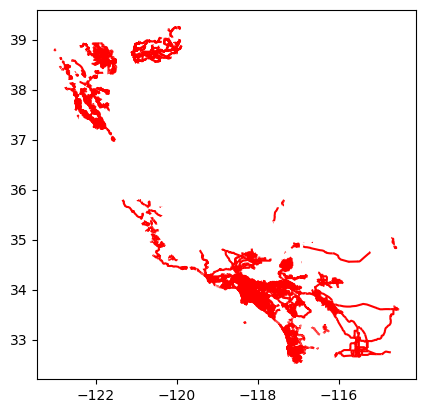

In [69]:
CA_bike_facilities.plot(color='red')

In [70]:
#CA_bike_facilities = gpd.GeoDataFrame(CA_bike_facilities,  crs='EPSG:4326', geometry = 'geometry')
CA_bike_facilities.to_file("H:/Desktop/AT Census/Bike Network/CA_Bike_facilties_with_six_class.shp")

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_1056\2830596023.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  CA_bike_facilities.to_file("H:/Desktop/AT Census/Bike Network/CA_Bike_facilties_with_six_class.shp")


In [55]:
# Bring OSM Bike Network
##https://www.tandfonline.com/doi/full/10.1080/15568318.2018.1519746

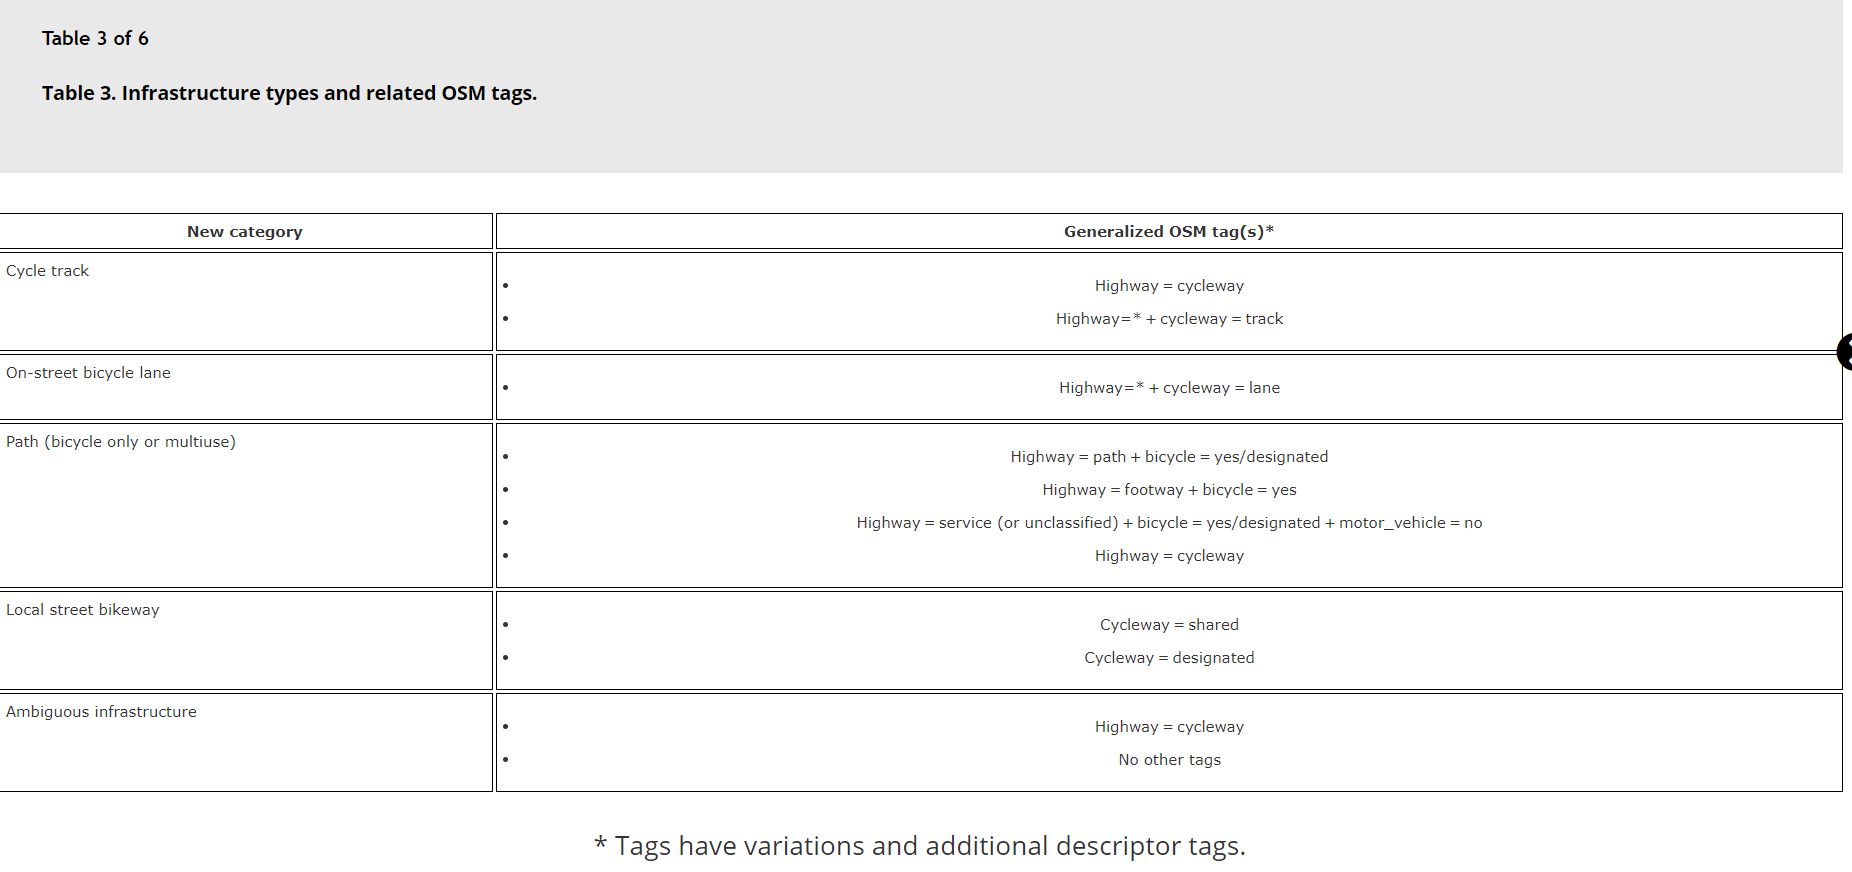

In [27]:
# lst the county in CA state
bdy_CA=gpd.read_file('D:/Bike_ped Exposure Model Project/CA_Counties/CA_Counties_TIGER2016.shp')
bdy_CA.tail()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
53,06,081,00277305,06081,San Mateo,San Mateo County,06,H1,G4020,488,41860,41884,A,1161658961,757412213,+37.4146633,-122.3715451,"POLYGON ((-13646335.912 4521323.747, -13646300..."
54,06,093,00277311,06093,Siskiyou,Siskiyou County,06,H1,G4020,None,None,None,A,16261974847,179108278,+41.5879861,-122.5332868,"POLYGON ((-13677924.003 5161573.734, -13677618..."
55,06,087,00277308,06087,Santa Cruz,Santa Cruz County,06,H1,G4020,488,42100,None,A,1152967330,419570389,+37.0124883,-122.0072050,"POLYGON ((-13605100.490 4469147.157, -13605081..."
56,06,021,00277275,06021,Glenn,Glenn County,06,H1,G4020,None,None,None,A,3403104376,33749275,+39.6025462,-122.4016998,"POLYGON ((-13680158.035 4814470.618, -13680202..."
57,06,079,00277304,06079,San Luis Obispo,San Luis Obispo County,06,H1,G4020,None,42020,None,A,8548640337,815490673,+35.3852242,-120.4475445,"POLYGON ((-13490260.152 4272335.748, -13490212..."


In [72]:
bdy_CA['NAMELSAD'].unique()

array(['Sierra County', 'Sacramento County', 'Santa Barbara County',
       'Calaveras County', 'Ventura County', 'Los Angeles County',
       'Sonoma County', 'Kings County', 'San Diego County',
       'Placer County', 'San Francisco County', 'Marin County',
       'Mariposa County', 'Lassen County', 'Napa County', 'Shasta County',
       'Monterey County', 'Trinity County', 'Mendocino County',
       'Inyo County', 'Mono County', 'Tuolumne County', 'Solano County',
       'San Bernardino County', 'Contra Costa County', 'Alpine County',
       'El Dorado County', 'Yolo County', 'Yuba County',
       'San Benito County', 'Humboldt County', 'Riverside County',
       'Kern County', 'Colusa County', 'Del Norte County', 'Modoc County',
       'Fresno County', 'Madera County', 'Santa Clara County',
       'Tehama County', 'San Joaquin County', 'Alameda County',
       'Nevada County', 'Butte County', 'Merced County', 'Tulare County',
       'Stanislaus County', 'Orange County', 'Imperial C

In [73]:
poly=bdy_CA.loc[bdy_CA['NAMELSAD']=='Sutter County']
poly2=gpd.GeoDataFrame(poly, geometry='geometry', crs='EPSG:3857') 
poly3=poly2.to_crs("epsg:4326")
poly3

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
49,06,101,00277315,06101,Sutter,Sutter County,06,H1,G4020,472,49700,None,A,1560255999,15724974,+39.0361898,-121.7039397,"POLYGON ((-121.92835 39.19873, -121.92873 39.1..."


In [129]:
poly3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

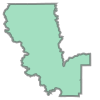

In [132]:
geom_sierra =poly3.loc[49, 'geometry']
geom_sierra

In [91]:
#poly_sis=gpd.read_file('H:/Desktop/AT Census/OSM Bike Network/Siskiyou_bdy.geojson')
#poly_sis=poly_sis[['geometry']]
#poly_sis2=gpd.GeoDataFrame(poly_sis, geometry='geometry', crs='EPSG:3857') 
#poly_sis3=poly_sis2.to_crs("epsg:4326")
#poly_sis3=poly_sis3.iloc[0]
#poly_sis3

geometry    POLYGON ((-122.87088 42.00397, -122.87324 42.0...
Name: 0, dtype: geometry

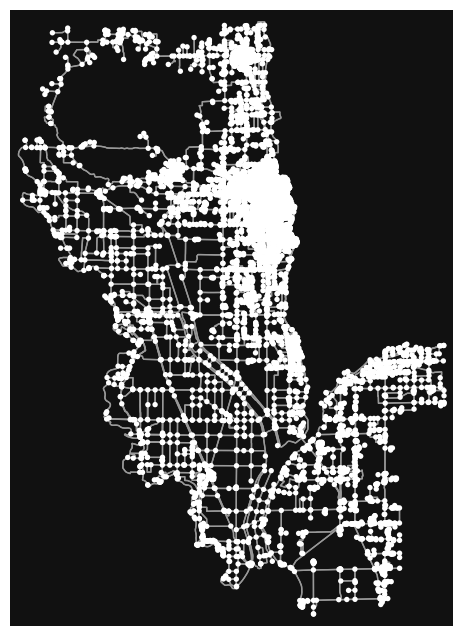

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [133]:
G = ox.graph_from_polygon(geom_sierra, network_type='bike')
ox.plot_graph(G)

In [134]:
ox.save_graph_shapefile(G, 'H:/Desktop/AT Census/OSM Bike Network/Sutter County_OSM_Bike_network_shapefile')

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


# Extract Data for Siskiyou County 

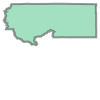

In [137]:
poly=bdy_CA.loc[bdy_CA['NAMELSAD']=='Siskiyou County']
poly2=gpd.GeoDataFrame(poly, geometry='geometry', crs='EPSG:3857') 
poly3=poly2.to_crs("epsg:4326").reset_index()
geom_sis =poly3.loc[0, 'geometry']
geom_sis

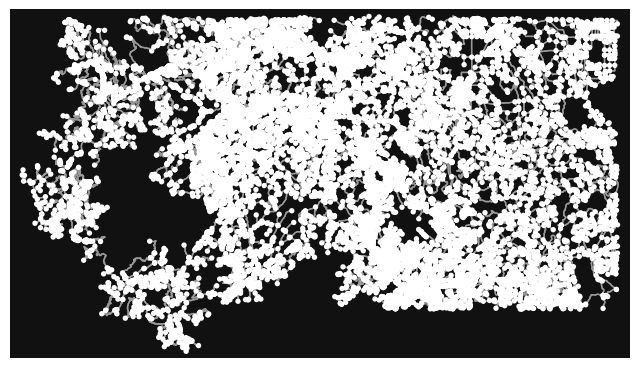

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [138]:
G1 = ox.graph_from_polygon(geom_sis, network_type='bike')
ox.plot_graph(G1)
ox.save_graph_shapefile(G1, 'H:/Desktop/AT Census/OSM Bike Network/Siskiyou County_OSM_Bike_network_shapefile')

# Now we will loop all others county of California to get the OSm network

In [75]:
county=list(bdy_CA['NAMELSAD'].unique())
county

['Sierra County',
 'Sacramento County',
 'Santa Barbara County',
 'Calaveras County',
 'Ventura County',
 'Los Angeles County',
 'Sonoma County',
 'Kings County',
 'San Diego County',
 'Placer County',
 'San Francisco County',
 'Marin County',
 'Mariposa County',
 'Lassen County',
 'Napa County',
 'Shasta County',
 'Monterey County',
 'Trinity County',
 'Mendocino County',
 'Inyo County',
 'Mono County',
 'Tuolumne County',
 'Solano County',
 'San Bernardino County',
 'Contra Costa County',
 'Alpine County',
 'El Dorado County',
 'Yolo County',
 'Yuba County',
 'San Benito County',
 'Humboldt County',
 'Riverside County',
 'Kern County',
 'Colusa County',
 'Del Norte County',
 'Modoc County',
 'Fresno County',
 'Madera County',
 'Santa Clara County',
 'Tehama County',
 'San Joaquin County',
 'Alameda County',
 'Nevada County',
 'Butte County',
 'Merced County',
 'Tulare County',
 'Stanislaus County',
 'Orange County',
 'Imperial County',
 'Sutter County',
 'Amador County',
 'Lake Count

In [95]:
county=list(bdy_CA['NAMELSAD'].unique())
for i in county:
    print(f"\"{i.rstrip()}\"")


"Sierra County"
"Sacramento County"
"Santa Barbara County"
"Calaveras County"
"Ventura County"
"Los Angeles County"
"Sonoma County"
"Kings County"
"San Diego County"
"Placer County"
"San Francisco County"
"Marin County"
"Mariposa County"
"Lassen County"
"Napa County"
"Shasta County"
"Monterey County"
"Trinity County"
"Mendocino County"
"Inyo County"
"Mono County"
"Tuolumne County"
"Solano County"
"San Bernardino County"
"Contra Costa County"
"Alpine County"
"El Dorado County"
"Yolo County"
"Yuba County"
"San Benito County"
"Humboldt County"
"Riverside County"
"Kern County"
"Colusa County"
"Del Norte County"
"Modoc County"
"Fresno County"
"Madera County"
"Santa Clara County"
"Tehama County"
"San Joaquin County"
"Alameda County"
"Nevada County"
"Butte County"
"Merced County"
"Tulare County"
"Stanislaus County"
"Orange County"
"Imperial County"
"Sutter County"
"Amador County"
"Lake County"
"Plumas County"
"San Mateo County"
"Siskiyou County"
"Santa Cruz County"
"Glenn County"
"San Luis Ob

In [98]:
# Write a for loop to get all OSM bike Network
county=["Sierra County","Sacramento County","Santa Barbara County","Calaveras County","Ventura County","Los Angeles County",
"Sonoma County","Kings County","San Diego County","Placer County","San Francisco","Marin County","Mariposa County",
"Lassen County","Napa County","Shasta County","Monterey County","Trinity County","Mendocino County","Inyo County","Mono County",
"Tuolumne County","Solano County","San Bernardino County","Contra Costa County","Alpine County","El Dorado County","Yolo County",
"Yuba County","San Benito County","Humboldt County","Riverside County","Kern County","Colusa County","Del Norte County","Modoc County",
"Fresno County","Madera County","Santa Clara County","Tehama County","San Joaquin County","Alameda County","Nevada County",
"Butte County","Merced County","Tulare County","Stanislaus County","Orange County","Imperial County","Amador County",
"Lake County","Plumas County","San Mateo County","Santa Cruz County","Glenn County","San Luis Obispo County"]
#county=list(bdy_CA['NAMELSAD'].unique())
for i in county:
    G = ox.graph_from_place(f"\"{i.rstrip()}\",'California, USA", network_type="bike")
    ox.save_graph_shapefile(G, 'H:/Desktop/AT Census/OSM Bike Network/'+str(i.rstrip())+'_OSM_Bike_network_shapefile')

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driv

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driv

ValueError: Nominatim could not geocode query ""Sutter County",'California, USA" to polygonal boundaries

In [ ]:
# End of OSM Data Extraction, combine all shape files in GIS.

In [77]:
## Try to pull whole CA state Network using polygon
ca_poly=gpd.read_file('H:/Desktop/AT Census/OSM Bike Network/ca-state-boundary/CA_State_TIGER2016.shp')
ca_poly2=gpd.GeoDataFrame(ca_poly, geometry='geometry', crs='EPSG:3857') 
ca_poly3=ca_poly2.to_crs("epsg:4326")
ca_poly3

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


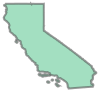

In [79]:
ca_poly4 =ca_poly3.loc[0, 'geometry']
ca_poly4

In [ ]:
# whole CA network extraction is too expensive, computer may crash
G_cal = ox.graph_from_polygon(ca_poly4, network_type='bike')
ox.save_graph_shapefile(G_cal, 'H:/Desktop/AT Census/OSM Bike Network/California_state_OSM_Bike_network_shapefile')

In [9]:
d=gpd.read_file('H:/Desktop/AT Census/OSM Bike Network/Lake County_OSM_Bike_network_shapefile/edges.shp')
d.columns

Index(['u', 'v', 'key', 'osmid', 'name', 'highway', 'oneway', 'reversed',
       'length', 'from', 'to', 'lanes', 'ref', 'maxspeed', 'service', 'bridge',
       'width', 'access', 'tunnel', 'junction', 'geometry'],
      dtype='object')

In [11]:
d=gpd.read_file('H:/Desktop/AT Census/OSM Bike Network/Siskiyou County_OSM_Bike_network_shapefile/edges.shp')
d2=[['u', 'v', 'key', 'osmid', 'name', 'highway', 'oneway', 'reversed',
       'length', 'from', 'to','lanes','maxspeed', 'geometry']]
d.columns

Index(['u', 'v', 'key', 'osmid', 'name', 'highway', 'oneway', 'reversed',
       'length', 'from', 'to', 'service', 'width', 'lanes', 'ref', 'bridge',
       'access', 'maxspeed', 'tunnel', 'geometry'],
      dtype='object')

In [13]:
# Read the OSM and join all 58 countries OSM shape file
county=list(bdy_CA['NAMELSAD'].unique())
California_Bike_OSM=[]
for i in county:
    d1=gpd.read_file('H:/Desktop/AT Census/OSM Bike Network/'+str(i.rstrip())+'_OSM_Bike_network_shapefile/edges.shp')
    d2=d1[['u', 'v', 'key', 'osmid', 'name', 'highway', 'oneway', 'reversed',
       'length', 'from', 'to','lanes','maxspeed', 'geometry']]
    California_Bike_OSM.append(d2) 
final_OSM_data = pd.concat(California_Bike_OSM)

In [14]:
final_OSM_data['highway'].unique()

array(['track', 'unclassified', 'residential', 'service', 'tertiary',
       "['track', 'residential']", "['residential', 'service']",
       "['residential', 'unclassified']", 'primary',
       "['track', 'service']", 'path', "['path', 'track']",
       "['service', 'unclassified']", "['path', 'service']",
       "['tertiary', 'unclassified']",
       "['residential', 'cycleway', 'service']", 'secondary',
       "['track', 'unclassified']", "['path', 'track', 'residential']",
       'road', "['residential', 'service', 'unclassified']", 'trunk',
       "['track', 'residential', 'unclassified']", 'trunk_link',
       "['service', 'path']", "['service', 'residential']",
       'living_street', "['unclassified', 'track', 'residential']",
       "['service', 'pedestrian']", "['unclassified', 'residential']",
       "['service', 'track']", "['service', 'track', 'residential']",
       "['path', 'residential']",
       "['service', 'unclassified', 'residential']",
       "['unclassified', 't

In [17]:
final_OSM_data.head()

,u,v,key,osmid,name,highway,oneway,reversed,length,from,to,lanes,maxspeed,geometry
0,91784160,91784169,0,"[10578300, 10588269]","['Forest Route 30', 'Forest Route 33']",track,0,"[False, True]",1635.946,91784169,91784160,None,None,"LINESTRING (-120.87547 39.50607, -120.87626 39..."
1,91784160,91794506,0,10578480,Henness Pass Road,unclassified,0,True,947.793,91794506,91784160,None,None,"LINESTRING (-120.87404 39.49928, -120.87414 39..."
2,91784160,91789665,0,10578480,Henness Pass Road,unclassified,0,False,433.673,91789665,91784160,None,None,"LINESTRING (-120.88823 39.49795, -120.88804 39..."
3,91784169,91784196,0,10578304,Alpha Colony Road,track,0,True,177.025,91784196,91784169,None,None,"LINESTRING (-120.87350 39.50630, -120.87364 39..."
4,91784169,91784525,0,10578305,Alpha Colony Road,track,0,False,763.896,91784525,91784169,None,None,"LINESTRING (-120.87334 39.50008, -120.87333 39..."


In [18]:
final_OSM_data.to_file("H:/Desktop/AT Census/Bike Network/California_OSM_Bike_Network1.shp")

In [19]:
#To write to GeoJSON: 
final_OSM_data.to_file("H:/Desktop/AT Census/Bike Network/California_OSM_Bike_Network1.json", driver="GeoJSON")

#To write to GeoPackage: 
#dataframe.to_file("H:/Desktop/AT Census/Bike Network/California_OSM_Bike_Network.gpkg", driver="GPKG")

In [44]:
# read the process facilities file
fac=pd.read_excel('H:/Desktop/AT Census/Count Data/Eco_OSM_City_Bike_facilities_Counter_V3.xls')
fac['geometry'] = [Point(xy) for xy in zip(fac.long, fac.lat)] 
fac1=gpd.GeoDataFrame(fac, geometry='geometry', crs='EPSG:4326') 
fac1

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,FID,FID_,id,serial_num,user_type,domain,site_name,lat,long,OBJECTID,...,to,lanes,maxspeed,OBJECTID_1,Join_Cou_1,TARGET_F_1,City Bicycle Facilities,Comments1,Comments2,geometry
0,0,0,100000572,T60B0090339,pedestrian,University of California Berkeley - AT Census,Park Trail,37.798027,-122.467575,1,...,0,,,1,0,1,Trail,OSM Facilities Asssigned based on Visualization,City Bicycle Facilities Assigned,POINT (-122.46757 37.79803)
1,1,1,100000595,U15B0090346,pedestrian,University of California Berkeley - AT Census,Ecology Trail,37.792583,-122.458150,2,...,0,,,2,0,2,Trail,OSM Facilities Asssigned based on Visualization,City Bicycle Facilities Assigned,POINT (-122.45815 37.79258)
2,2,2,100000671,X0412011792,['bicycle' 'pedestrian'],University of California Berkeley - AT Census,BART AT SPIRE,37.791160,-122.459440,3,...,1940859976,,,3,0,3,Path,NaN,City Bicycle Facilities Assigned,POINT (-122.45944 37.79116)
3,3,3,100001127,,bicycle,SFMTA,Broadway Tunnel west of Hyde St Overpass EB (old),37.796165,-122.419490,4,...,6780030869,"['2', '3']","['40 mph', '35 mph']",4,1,4,Bike Route,NaN,NaN,POINT (-122.41949 37.79617)
4,4,4,100002415,,bicycle,SFMTA,Fell Street west of Scott WB (old site),37.774200,-122.436295,5,...,5433624459,"['4', '3']",30 mph,5,1,5,Bike Lane,NaN,NaN,POINT (-122.43630 37.77420)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,381,383,300026847,Y2H20063025,bicycle,City of Oakland,MOBILE - Port View Park,37.806238,-122.331649,382,...,0,,,382,0,382,Path,OSM Facilities Asssigned based on Visualization,City Bicycle Facilities Assigned,POINT (-122.33165 37.80624)
382,382,384,300026848,Y2H20063027,bicycle,City of Oakland,MOBILE - Maritime St and Admiral Toney way,37.820552,-122.302511,383,...,271823218,,,383,0,383,Cycle Track,NaN,City Bicycle Facilities Assigned,POINT (-122.30251 37.82055)
383,383,385,300027566,,bicycle,City of Oakland,TEST,37.851001,-122.277832,384,...,0,,,384,0,384,Path,OSM Facilities Asssigned based on Visualization,City Bicycle Facilities Assigned,POINT (-122.27783 37.85100)
384,384,363,300022656,XMH17072645,['bicycle' 'pedestrian'],University of California Berkeley - AT Census,Pepper Street Bridge - City of SLO,35.287736,-120.657826,385,...,271824037,,,385,0,385,Path,NaN,City Bicycle Facilities Assigned,POINT (-120.65783 35.28774)


In [50]:
reg=bdy_CA[['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD','geometry']]
reg1=gpd.GeoDataFrame(reg, geometry='geometry', crs='EPSG:3857') 
reg2=reg1.to_crs("epsg:4326")
reg2.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,geometry
0,06,091,00277310,06091,Sierra,Sierra County,"POLYGON ((-120.65560 39.69357, -120.65554 39.6..."
1,06,067,00277298,06067,Sacramento,Sacramento County,"POLYGON ((-121.18858 38.71431, -121.18732 38.7..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,"MULTIPOLYGON (((-120.58191 34.09856, -120.5822..."
3,06,009,01675885,06009,Calaveras,Calaveras County,"POLYGON ((-120.63095 38.34111, -120.63058 38.3..."
4,06,111,00277320,06111,Ventura,Ventura County,"MULTIPOLYGON (((-119.63631 33.27304, -119.6360..."


In [49]:
reg.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
fac2=gpd.sjoin(fac1,reg2)
fac2

,FID,FID_,id,serial_num,user_type,domain,site_name,lat,long,OBJECTID,...,Comments1,Comments2,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD
0,0,0,100000572,T60B0090339,pedestrian,University of California Berkeley - AT Census,Park Trail,37.798027,-122.467575,1,...,OSM Facilities Asssigned based on Visualization,City Bicycle Facilities Assigned,POINT (-122.46757 37.79803),10,06,075,00277302,06075,San Francisco,San Francisco County
1,1,1,100000595,U15B0090346,pedestrian,University of California Berkeley - AT Census,Ecology Trail,37.792583,-122.458150,2,...,OSM Facilities Asssigned based on Visualization,City Bicycle Facilities Assigned,POINT (-122.45815 37.79258),10,06,075,00277302,06075,San Francisco,San Francisco County
2,2,2,100000671,X0412011792,['bicycle' 'pedestrian'],University of California Berkeley - AT Census,BART AT SPIRE,37.791160,-122.459440,3,...,NaN,City Bicycle Facilities Assigned,POINT (-122.45944 37.79116),10,06,075,00277302,06075,San Francisco,San Francisco County
3,3,3,100001127,,bicycle,SFMTA,Broadway Tunnel west of Hyde St Overpass EB (old),37.796165,-122.419490,4,...,NaN,NaN,POINT (-122.41949 37.79617),10,06,075,00277302,06075,San Francisco,San Francisco County
4,4,4,100002415,,bicycle,SFMTA,Fell Street west of Scott WB (old site),37.774200,-122.436295,5,...,NaN,NaN,POINT (-122.43630 37.77420),10,06,075,00277302,06075,San Francisco,San Francisco County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,321,322,100064687,XMH18024579,bicycle,University of California Berkeley - AT Census,Foothill/LOVR,35.276689,-120.711642,322,...,NaN,NaN,POINT (-120.71164 35.27669),57,06,079,00277304,06079,San Luis Obispo,San Luis Obispo County
326,326,327,300017254,XMH17072644,['bicycle' 'pedestrian'],University of California Berkeley - AT Census,SB Traffic - S Oak Park Blvd,35.117723,-120.609520,327,...,NaN,City Bicycle Facilities Assigned,POINT (-120.60952 35.11772),57,06,079,00277304,06079,San Luis Obispo,San Luis Obispo County
327,327,328,300017404,XMH17072643,['bicycle' 'pedestrian'],University of California Berkeley - AT Census,NB Traffic - S Oak Park Blvd,35.117601,-120.609224,328,...,NaN,City Bicycle Facilities Assigned,POINT (-120.60922 35.11760),57,06,079,00277304,06079,San Luis Obispo,San Luis Obispo County
384,384,363,300022656,XMH17072645,['bicycle' 'pedestrian'],University of California Berkeley - AT Census,Pepper Street Bridge - City of SLO,35.287736,-120.657826,385,...,NaN,City Bicycle Facilities Assigned,POINT (-120.65783 35.28774),57,06,079,00277304,06079,San Luis Obispo,San Luis Obispo County


In [55]:
fac2.to_csv('H:/Desktop/AT Census/Count Data/Eco_OSM_City_Bike_facilities_Counter_V4.csv')